In [1]:
import keras
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import time
import cv2

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#Reshape the training and test set
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#Padding the images by 2 pixels since in the paper input images were 32x32
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

Y_test_post_train = Y_test

# convert digit labels (0-9) in one-hot encoded binary vectors. 
# These correspond to the training/test labels at the output of the net. 
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

print('Train: X=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, Y_test.shape))

Train: X=(60000, 32, 32, 1), y=(60000, 10)
Test: X=(10000, 32, 32, 1), y=(10000, 10)


In [3]:
model = tf.keras.models.load_model("../../Saved_model/50_epochs.h5")

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [4]:
predictions = model.predict(X_test)

In [5]:
print(predictions[793])

[5.0195652e-28 8.0372470e-24 8.0561593e-23 1.9812164e-17 1.4276573e-27
 3.2826859e-18 7.4007122e-21 3.6954026e-25 1.0000000e+00 1.2749259e-25]


In [6]:
number = np.argmax(predictions[791])
print(number)
cv2.imshow('example' ,X_test[791]*255)
cv2.waitKey(0)
cv2.destroyAllWindows()

5


(10000,) 10000
Accuracy:  0.9914
Precision:  0.9913464509349778
Recall:  0.9912813922852411


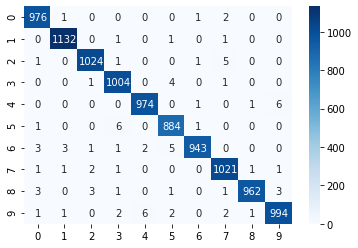

In [7]:
# Confusion Matrix
y_pred = []
for i in range (0, 10000):
  pred = np.argmax(predictions[i])
  y_pred.append(pred)
print(Y_test_post_train.shape, len(y_pred))
cm = confusion_matrix(Y_test_post_train, y_pred)

df_cm = pd.DataFrame(cm, index = np.unique(Y_test_post_train), columns=np.unique(Y_test_post_train))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}, cmap='Blues', fmt="d")

accuracy = accuracy_score(Y_test_post_train, y_pred)
f1 = f1_score(Y_test_post_train, y_pred, average='macro')
precision = precision_score(Y_test_post_train, y_pred, average='macro')
recall = recall_score(Y_test_post_train, y_pred, average='macro')

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)

In [8]:
filter_conv_0 = np.zeros((5, 5, 1, 6))
bias_conv_0 = np.zeros(6)
filter_conv_1 = np.zeros((5, 5, 6, 16))
bias_conv_1 = np.zeros(16)
W0 = np.zeros((120, 400))
B0 = np.zeros(120)
W1 = np.zeros((84, 120))
B1 = np.zeros(84)
W2 = np.zeros((10, 84))
B2 = np.zeros(10)

for layer in model.layers:
  weights = layer.get_weights() # list of numpy arrays
  for i in range(len(weights)):
    print('-------------------------------------')
    
    np_weight = np.array(weights[i])

    if(np_weight.shape == filter_conv_0.shape):
        filter_conv_0 = np_weight
        print('Conv0 layer: ', filter_conv_0.shape)
    elif(np_weight.shape == bias_conv_0.shape):
        bias_conv_0 = np_weight
        print('Bias conv0: ', bias_conv_0.shape)
    elif(np_weight.shape == filter_conv_1.shape):
        filter_conv_1 = np_weight
        print('Conv1 layer: ', filter_conv_1.shape)
    elif(np_weight.shape == bias_conv_1.shape):
        bias_conv_1 = np_weight
        print('Bias conv1: ', bias_conv_1.shape)
    elif(np_weight.shape == np.transpose(W0).shape):
        W0 = np.transpose(np_weight)
        print('W0: ', W0.shape)
    elif(np_weight.shape == B0.shape):
        B0 = np_weight
        print('B0: ', B0.shape)
    elif(np_weight.shape == np.transpose(W1).shape):
        W1 = np.transpose(np_weight)
        print('W1: ', W1.shape)
    elif(np_weight.shape == B1.shape):
        B1 = np_weight
        print('B1: ', B1.shape)
    elif(np_weight.shape == np.transpose(W2).shape):
        W2 = np.transpose(np_weight)
        print('W2: ', W2.shape)
    elif(np_weight.shape == B2.shape):
        B2 = np_weight
        print('B2: ', B2.shape)

-------------------------------------
Conv0 layer:  (5, 5, 1, 6)
-------------------------------------
Bias conv0:  (6,)
-------------------------------------
Conv1 layer:  (5, 5, 6, 16)
-------------------------------------
Bias conv1:  (16,)
-------------------------------------
W0:  (120, 400)
-------------------------------------
B0:  (120,)
-------------------------------------
W1:  (84, 120)
-------------------------------------
B1:  (84,)
-------------------------------------
W2:  (10, 84)
-------------------------------------
B2:  (10,)
